In [1]:
import pandas
from matplotlib import pyplot as plt

In [2]:
def rollingMean(df, window=3):
    new_df = df.copy()
    new_df["ax"] = new_df["ax"].rolling(window).mean()
    new_df["ay"] = new_df["ay"].rolling(window).mean()
    new_df["az"] = new_df["az"].rolling(window).mean()
    new_df["gx"] = new_df["gx"].rolling(window).mean()
    new_df["gy"] = new_df["gy"].rolling(window).mean()
    new_df["gz"] = new_df["gz"].rolling(window).mean()
    
    return new_df

In [44]:
def cumulativeSum(df):
    new_df = df.copy()
    new_df["ax"] = new_df["ax"].cumsum()
    new_df["ay"] = new_df["ay"].cumsum()
    new_df["az"] = new_df["az"].cumsum()
    new_df["gx"] = new_df["gx"].cumsum()
    new_df["gy"] = new_df["gy"].cumsum()
    new_df["gz"] = new_df["gz"].cumsum()
    
    return new_df

In [99]:
def show(fileName, limit_y=True, rolling_mean=True):
    df = pandas.read_csv(fileName)
    
    if rolling_mean:
        df = rollingMean(df)
    
    #df = df.iloc[25:35]
    print(f"Showing data from: \"{fileName}\"")
    print("Number of readings: ", df.shape[0])

    plt.rcParams["figure.figsize"] = (20,5)

    # plot acc data
    ax = plt.gca()
    y_lim_acc = 1.4
    if limit_y: ax.set_ylim([-y_lim_acc, y_lim_acc])

    df.plot(x="time", y="ax",ax=ax)
    df.plot(x="time", y="ay",ax=ax)
    df.plot(x="time", y="az",ax=ax)

    plt.title("accelerometer data")
    plt.xlabel("time (10th of second)")
    plt.ylabel("acceleration (g)")
    plt.legend()

    plt.show()

    # plot gyro data
    ax = plt.gca()
    y_axis_lim_gyro = 300
    if limit_y: ax.set_ylim([-y_axis_lim_gyro, y_axis_lim_gyro])

    df.plot(x="time", y="gx",ax=ax)
    df.plot(x="time", y="gy",ax=ax)
    df.plot(x="time", y="gz",ax=ax)

    plt.title("gyroscope data")
    plt.xlabel("time (10th of second)")
    plt.ylabel("angular velocity (deg/s)")
    plt.legend()

    plt.show()

In [61]:
# Data collected from gestures, with documentation


paikallaan = "test_data/paikallaan.csv"
nykaisy = "test_data/nykaisy.csv"
nosto = "test_data/nosto.csv"
# Test is the test data that was made available to us


hinge90_right = "hinge/hinge90_right.csv"
hinge45_right = "hinge/hinge45_right.csv"
# Hinge movement
# 
# With the sensortag flat on the table, lift it up from one side,
# keeping an edge touching the table. Lift to a given angle, before
# returning it flat onto the table.
# hinge45 only brings it 45 degrees.
# hinge90 brings it 90 degrees. Notice how az and ay switch places.
# _right means that the right edge of the sensortag was kept
# in contact with the table.
# 
# Gesture: Perhaps eating?


upDown_10 = "vertical/upDown_10.csv"
upDown_30 = "vertical/upDown_30.csv"
# Moving up then down
# 
# _10 means about 10cm above table
# Movement speed, normal and deliberate
# 
# Gesture: Playing?


rightLeft_normal = "sideways/rightLeft_normal.csv"
leftRight_normal = "sideways/leftRight_normal.csv"
rightLeft_hard_twice = "sideways/rightLeft_hard_twice.csv"
rightLeft_gentle_twice = "sideways/rightLeft_gentle_twice.csv"
# Movement: Right, left
# 
# Distance: about 15 cm sideways. No vertical movement.
# 
# _twice means it was moved back and forth 2 times.
# 
# Gesture: Petting?

Showing data from: "sideways/leftRight_normal.csv"
Number of readings:  40


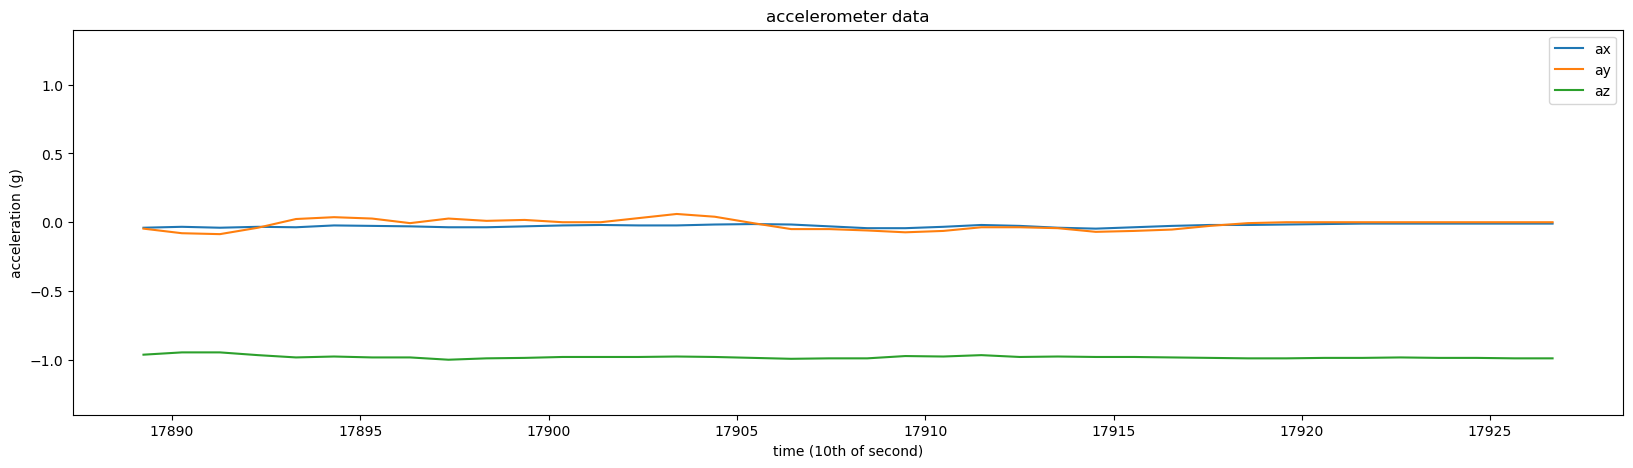

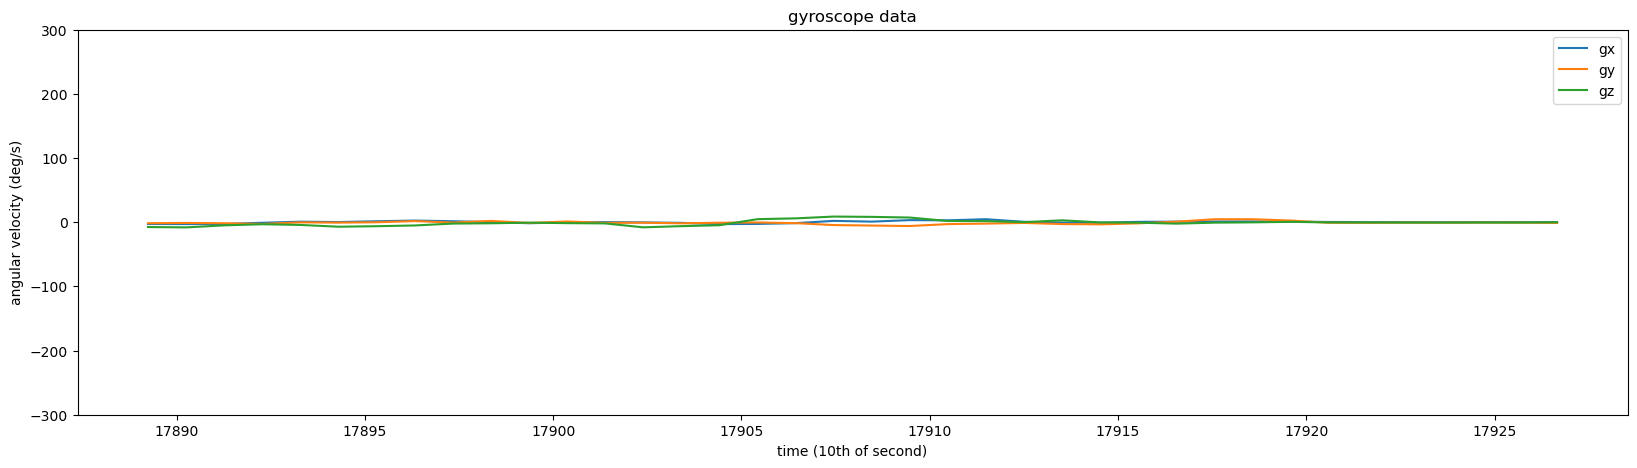

In [100]:
show(leftRight_normal, rolling_mean=True)

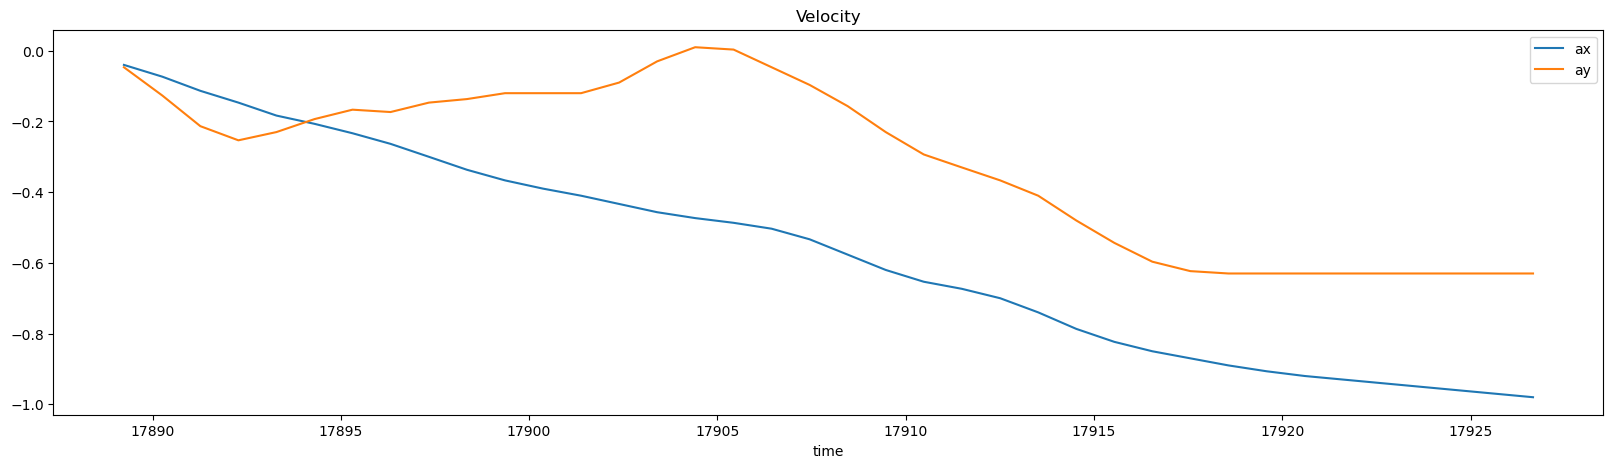

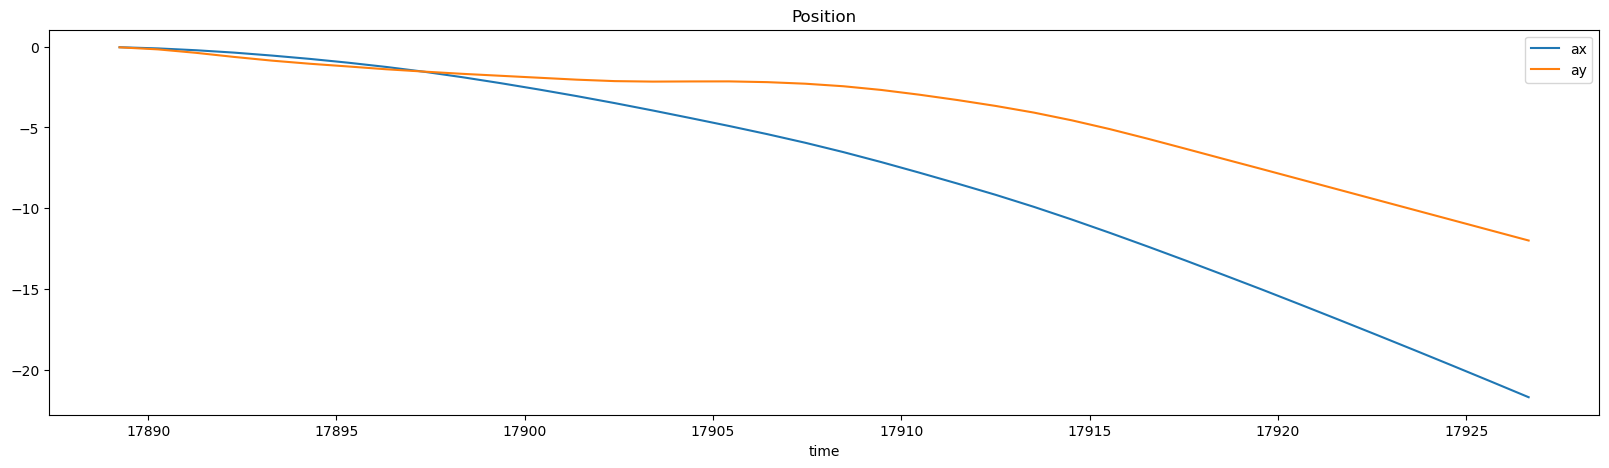

In [92]:
# Velocity and position

df = pandas.read_csv(leftRight_normal)
df = rollingMean(df)
vel = cumulativeSum(df)
pos = cumulativeSum(vel)

ax = plt.gca()

vel.plot(x="time", y="ax",ax=ax)
vel.plot(x="time", y="ay",ax=ax)
#vel.plot(x="time", y="az",ax=ax)

plt.title("Velocity")
plt.show()

ax = plt.gca()

pos.plot(x="time", y="ax",ax=ax)
pos.plot(x="time", y="ay",ax=ax)

plt.title("Position")
plt.show()

Showing data from: "vertical/upDown_10.csv"
Number of readings:  40


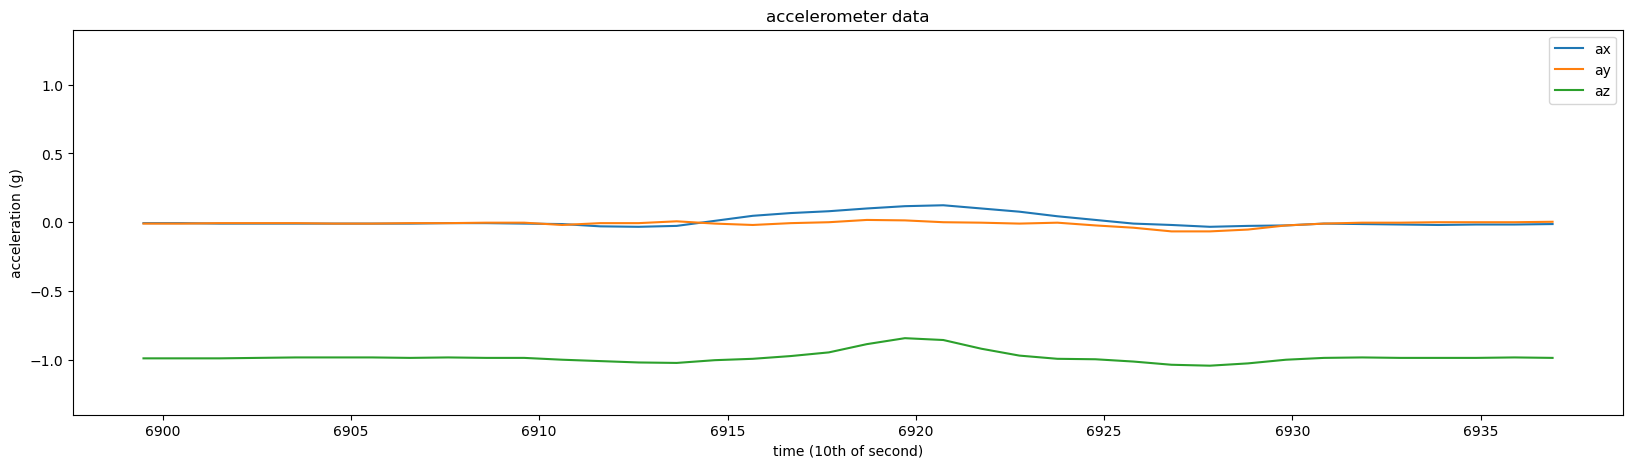

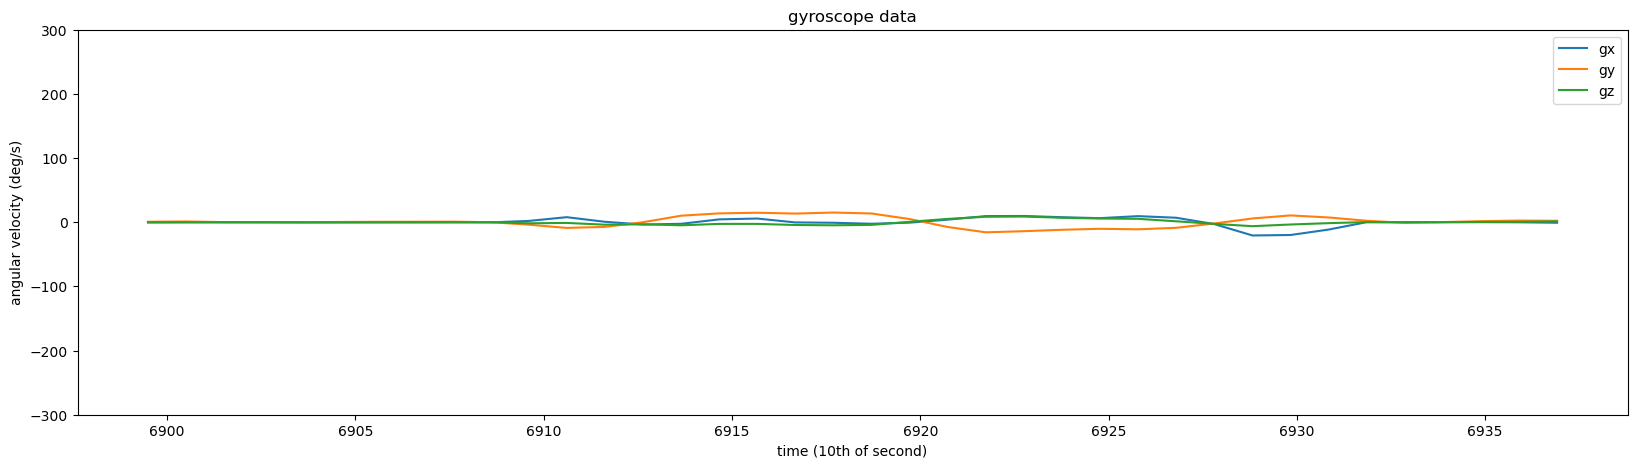

In [101]:
show(upDown_10, rolling_mean=True)

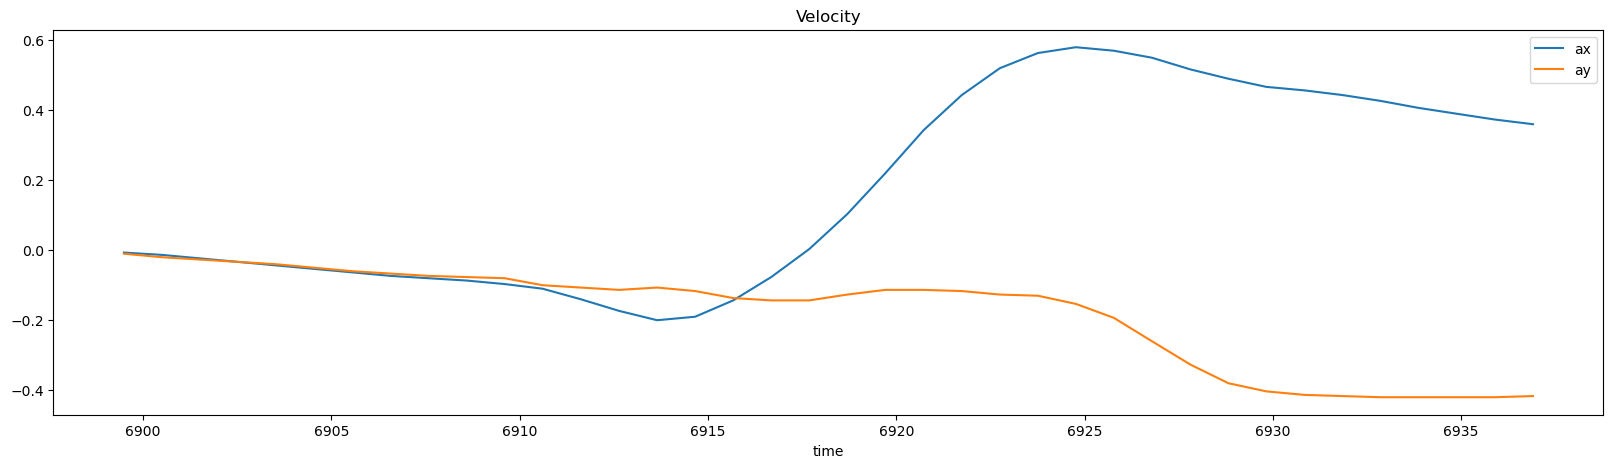

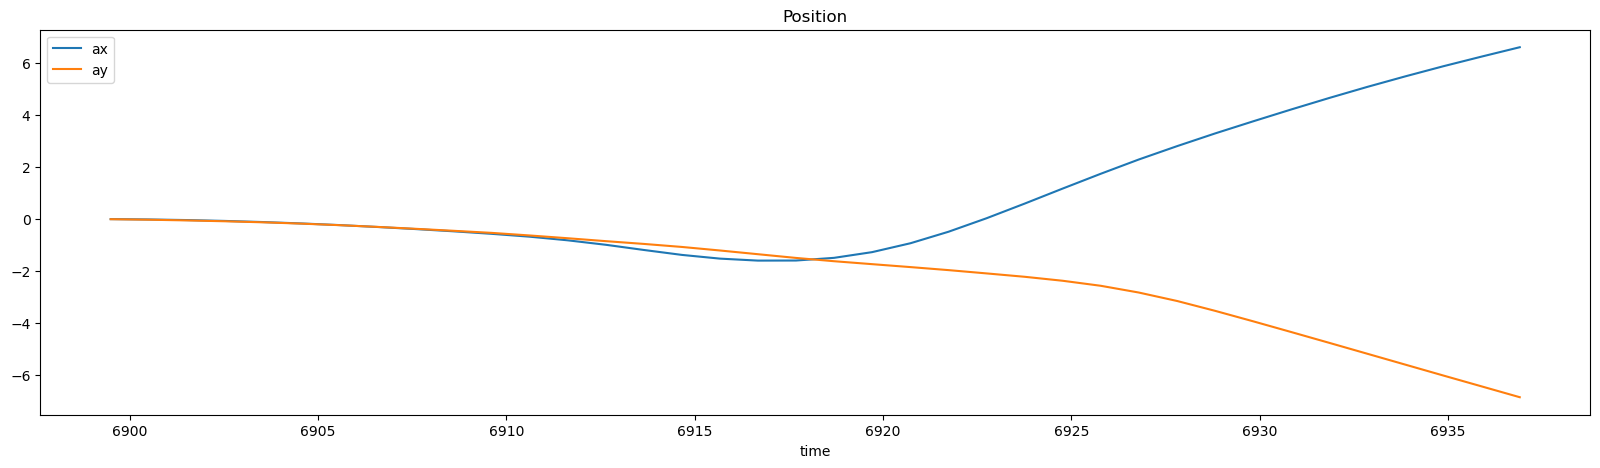

In [95]:
# Velocity and position

df = pandas.read_csv(upDown_10)
df = rollingMean(df)
vel = cumulativeSum(df)
pos = cumulativeSum(vel)

ax = plt.gca()

vel.plot(x="time", y="ax",ax=ax)
vel.plot(x="time", y="ay",ax=ax)
#vel.plot(x="time", y="az",ax=ax)

plt.title("Velocity")
plt.show()

ax = plt.gca()

pos.plot(x="time", y="ax",ax=ax)
pos.plot(x="time", y="ay",ax=ax)

plt.title("Position")
plt.show()

Showing data from: "hinge/hinge45_right.csv"
Number of readings:  40


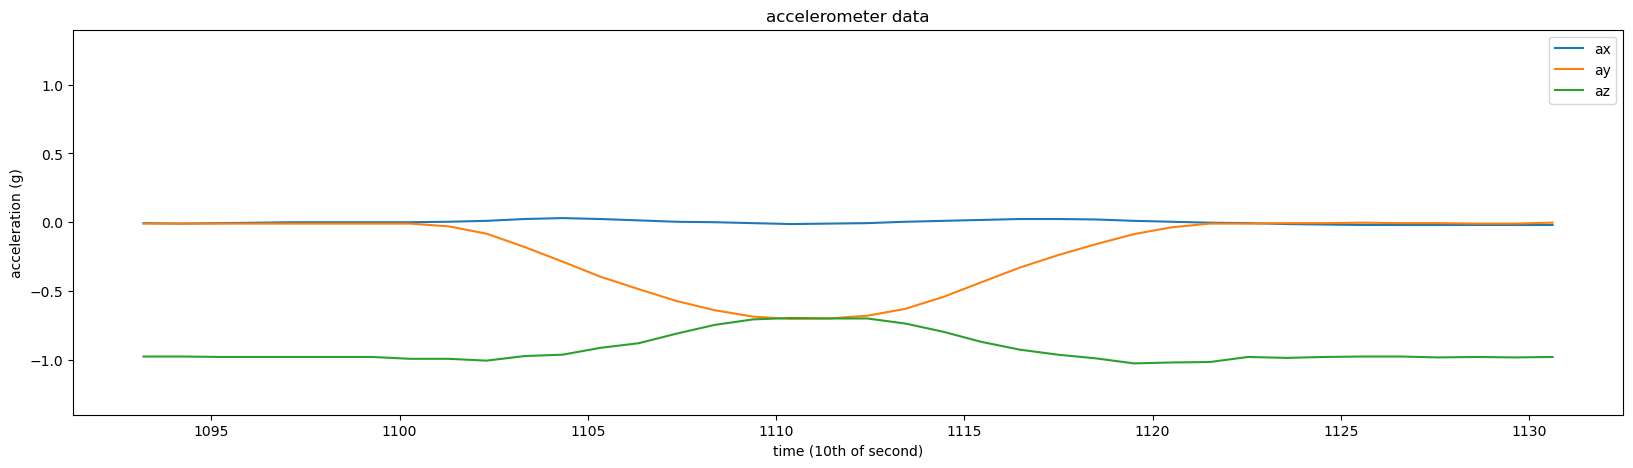

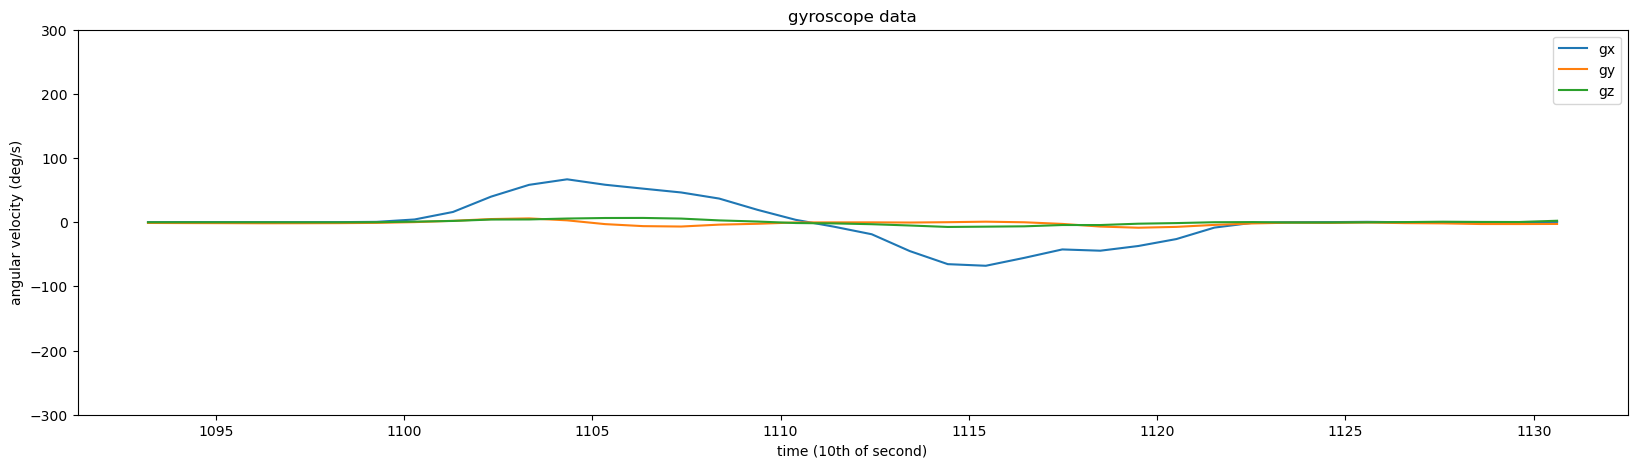

In [102]:
show(hinge45_right, rolling_mean=True)

Showing data from: "hinge/hinge90_right.csv"
Number of readings:  40


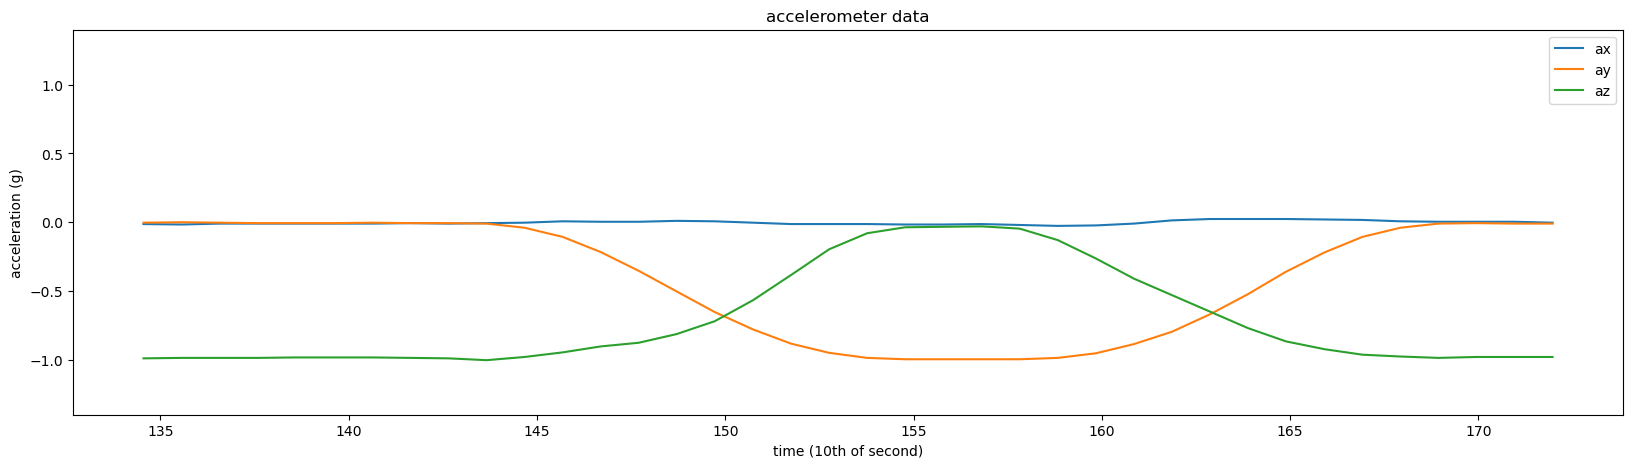

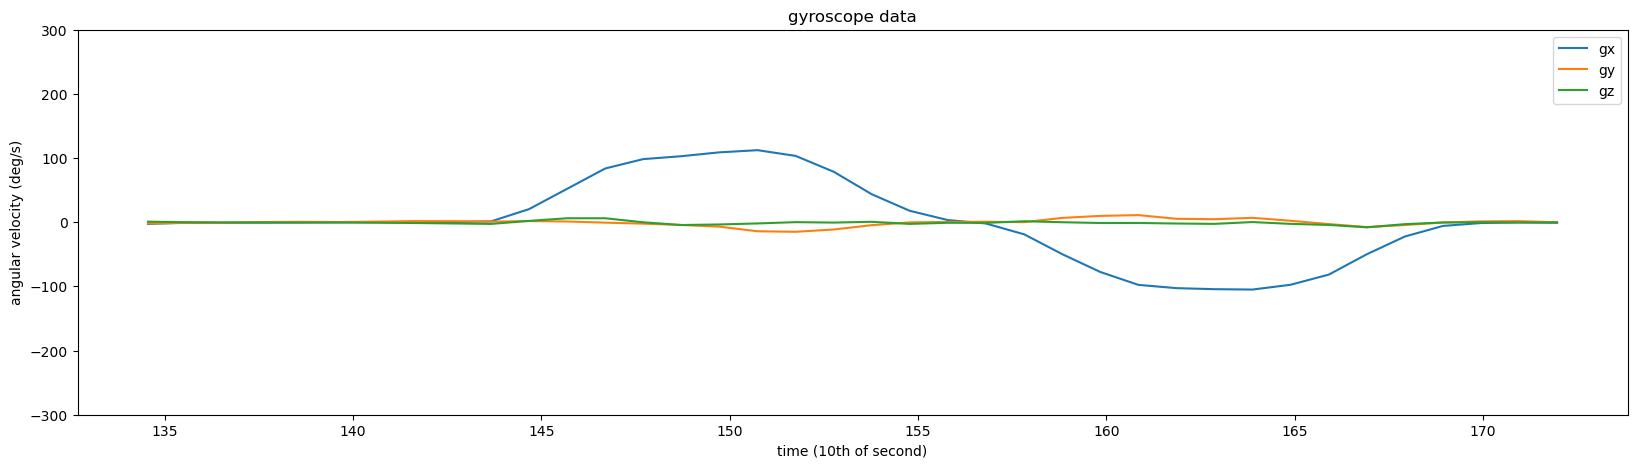

In [103]:
show(hinge90_right, rolling_mean=True)

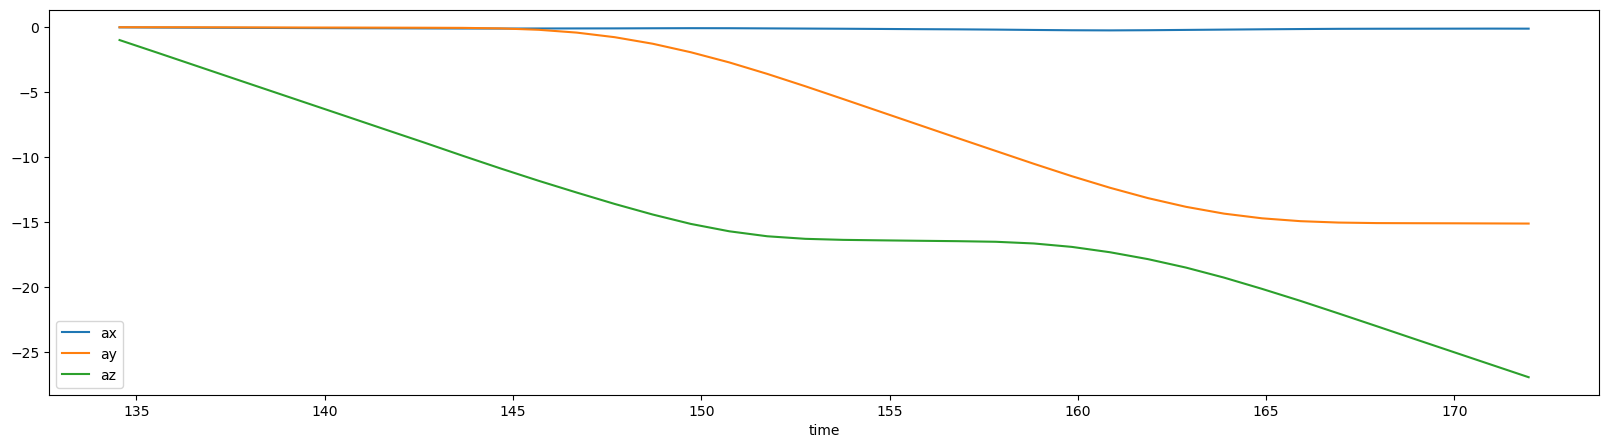

In [104]:
# Velocity for hinge movement

df = pandas.read_csv(hinge90_right)
df = rollingMean(df)
vel = cumulativeSum(df)

ax = plt.gca()

vel.plot(x="time", y="ax",ax=ax)
vel.plot(x="time", y="ay",ax=ax)
vel.plot(x="time", y="az",ax=ax)

plt.show()